<a href="https://colab.research.google.com/github/amikoshimrah/Deployment/blob/main/Diabetes_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [ ]:
# Load dataset
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
print(f'Shape: {df.shape}')
print(f'Nan count:\n{df.isnull().sum()}')
print(f'Zero count:\n{(df == 0).sum()}')


Shape: (768, 9)
Nan count:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Zero count:
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [ ]:
# Count class instances
class_counts = df['Outcome'].value_counts()

# Calculate percentage
class_percent = df['Outcome'].value_counts(normalize=True) * 100

# Display both
class_distribution = pd.DataFrame({
    'Count': class_counts,
    'Percentage': class_percent.round(2)
})

print(class_distribution)


         Count  Percentage
Outcome                   
0          500        65.1
1          268        34.9


 Issues Identified:
Features like Glucose, BloodPressure, SkinThickness, Insulin, and BMI have minimum values of 0, which is physiologically implausible and likely indicate missing or invalid data.

There is moderate class imbalance:

500 non-diabetic (65%)

268 diabetic (35%)

In [ ]:
# Replace 0s with NaN in columns where 0 is not a valid value
cols_with_zero_invalid = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero_invalid] = df[cols_with_zero_invalid].replace(0, np.nan)

In [ ]:
# Impute missing values with median
df.fillna(df.median(), inplace=True)

In [ ]:
# Split features and target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Let's check after scaled
print(f'train scaled:\n {X_train_scaled}')
print(f'test scaled:\n {X_test_scaled}')

train scaled:
 [[-0.85135507 -1.05642747 -0.82674004 ... -0.76947697  0.31079384
  -0.79216928]
 [ 0.35657564  0.14439907  0.47777235 ... -0.41749769 -0.11643851
   0.56103382]
 [-0.5493724  -0.55608308 -1.15286813 ...  0.3597899  -0.76486207
  -0.70759409]
 ...
 [-0.85135507 -0.82293342 -0.17448384 ...  0.82909561 -0.78607218
  -0.28471812]
 [ 1.86648903 -0.35594533 -0.17448384 ... -0.72547956 -1.01938346
   0.56103382]
 [ 0.05459296  0.74481233 -1.15286813 ... -0.43216349 -0.57700104
   0.30730824]]
test scaled:
 [[ 0.96054099  1.24515673 -0.66367599 ... -0.74014536 -0.55579092
   0.56103382]
 [ 1.86648903 -1.79026591  2.76066903 ...  0.44778472 -0.58306107
   1.15306018]
 [-0.5493724   0.01097389  0.3147083  ...  0.50644793  0.01688223
  -0.6230189 ]
 ...
 [-0.5493724  -1.32327781 -1.64206028 ... -0.57882152  3.70138246
  -0.70759409]
 [ 0.05459296  2.07906404  0.47777235 ...  0.66777177 -0.64669142
  -0.20014293]
 [-0.85135507 -1.69019703  0.47777235 ...  0.11047124 -0.16794879
  -

In [ ]:
# Build the Neural Network
model = Sequential([
    tf.keras.Input(shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

In [ ]:
# Train the Model
history = model.fit(X_train_scaled, y_train,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=32,
                    verbose=1)

Epoch 1/50
16/16 [==============================] - 2s 51ms/step - loss: 0.7788 - accuracy: 0.4705 - auc: 0.4352 - val_loss: 0.7031 - val_accuracy: 0.4959 - val_auc: 0.4886
Epoch 2/50
16/16 [==============================] - 0s 6ms/step - loss: 0.6921 - accuracy: 0.5580 - auc: 0.5344 - val_loss: 0.6377 - val_accuracy: 0.6667 - val_auc: 0.6423
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 0.6495 - accuracy: 0.6029 - auc: 0.5775 - val_loss: 0.5907 - val_accuracy: 0.6992 - val_auc: 0.7263
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 0.5899 - accuracy: 0.6558 - auc: 0.7044 - val_loss: 0.5558 - val_accuracy: 0.7073 - val_auc: 0.7804
Epoch 5/50
16/16 [==============================] - 0s 5ms/step - loss: 0.5630 - accuracy: 0.6802 - auc: 0.7460 - val_loss: 0.5301 - val_accuracy: 0.7236 - val_auc: 0.8012
Epoch 6/50
16/16 [==============================] - 0s 24ms/step - loss: 0.5371 - accuracy: 0.7047 - auc: 0.7783 - val_loss: 0.5119 - val_a

In [ ]:
# Evaluate the Model
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred_prob))

5/5 [==============================] - 0s 2ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       100
           1       0.63      0.59      0.61        54

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154

Confusion Matrix:
 [[81 19]
 [22 32]]
AUC-ROC Score: 0.8148148148148148


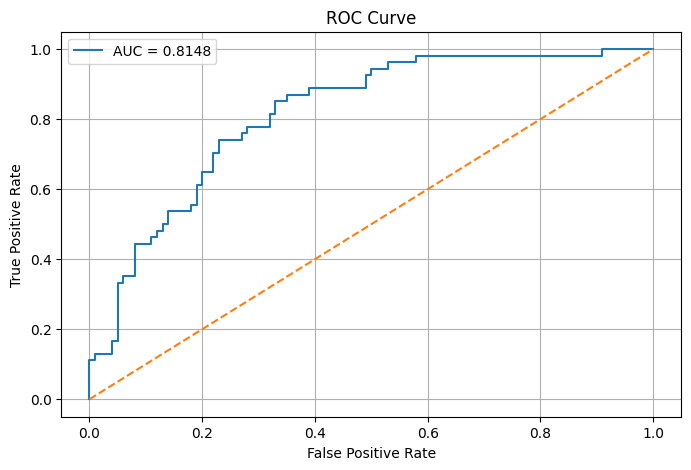

In [ ]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_pred_prob):.4f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

🧠 Inference You Can Expect:
Accuracy: Typically between 75–82% depending on training split and dropout settings.

AUC-ROC: Should exceed 0.80, indicating the model's good ability to distinguish between diabetic and non-diabetic individuals.

Confusion Matrix and Classification Report will show balanced sensitivity (recall) and specificity (precision), thanks to the dropout layers and preprocessing.

**Hyperparameter Tuning and Optimization**

In [ ]:
#!pip uninstall -y keras-tuner keras tensorflow scikeras
#!pip install tensorflow==2.15 keras==2.15 scikeras==0.12.0 scikit-learn==1.3.2


Found existing installation: keras 3.9.2
Uninstalling keras-3.9.2:
  Successfully uninstalled keras-3.9.2
Found existing installation: tensorflow 2.19.0
Uninstalling tensorflow-2.19.0:
  Successfully uninstalled tensorflow-2.19.0
Found existing installation: scikeras 0.13.0
Uninstalling scikeras-0.13.0:
  Successfully uninstalled scikeras-0.13.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 103.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 78.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 100.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━

In [ ]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop


In [ ]:
# 2. Define a function to build the Keras model
def build_model(units1=32, units2=16, dropout_rate=0.2, optimizer='adam'):
    model = Sequential()
    model.add(Dense(units1, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units2, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# 3. Wrap with KerasClassifier
keras_clf = KerasClassifier(model=build_model, verbose=0)

In [ ]:
# 4. Define Hyperparameter Grid
param_grid = {
    'model__units1': [32, 64],
    'model__units2': [16, 32],
    'model__dropout_rate': [0.2, 0.3],
    'model__optimizer': ['adam', 'rmsprop'],
    'batch_size': [16, 32],
    'epochs': [50, 100]
}

In [ ]:
# 5. Define Stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# 6. Grid Search
grid = GridSearchCV(estimator=keras_clf,
                    param_grid=param_grid,
                    scoring='accuracy',
                    cv=cv,
                    verbose=2,
                    n_jobs=-1)

In [ ]:
# 7. Fit Grid Search
grid_result = grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:

# 8. Print Results
print("Best Score: {:.4f} using {}".format(grid_result.best_score_, grid_result.best_params_))


Best Score: 0.7932 using {'batch_size': 32, 'epochs': 50, 'model__dropout_rate': 0.3, 'model__optimizer': 'adam', 'model__units1': 32, 'model__units2': 16}
